In [170]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [171]:
data = pd.read_csv('bank_marketing_dataset.csv')

In [172]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [173]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [174]:
data.duplicated().sum()


0

In [175]:
X = data[['age','job','balance','loan','contact','deposit']]

In [176]:
X.dtypes
X['deposit'] = X['deposit'].map({"yes" : 1,"no" : 0})

C:\Users\trisha\AppData\Local\Temp\ipykernel_1452\210274335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['deposit'] = X['deposit'].map({"yes" : 1,"no" : 0})


In [177]:
num_cols = X.select_dtypes(include='number').columns

# Remove outliers column-wise
for col in num_cols:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
    

In [178]:
from sklearn.preprocessing import LabelEncoder

 
Business Scenario
A retail bank runs marketing campaigns to sell term deposit plans to customers.
Calling every customer is expensive and inefficient.
The bank wants a rule-based system that can decide:
“Should we contact this customer or not?”
Management prefers a model whose decisions can be:
Clearly explained
Converted into if–else rules
Understood by non-technical staff

In [179]:
y = X['deposit']
X = X[['age','job','balance','loan','contact']]

In [180]:
le =LabelEncoder()

In [181]:
for col in X.select_dtypes(include='object'):
    X[col] = le.fit_transform(X[col])

In [182]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 9954, dtype: int64

#removing outliers

In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [197]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state = 42)

In [198]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

In [199]:
y_pred = model.predict(X_test)

In [200]:
print("accuracy_score",accuracy_score(y_test,y_pred))

accuracy_score 0.6212958312405826


In [201]:
print("confusion_matrix",confusion_matrix(y_test,y_pred))

confusion_matrix [[830 232]
 [522 407]]


In [203]:
data = pd.DataFrame([[45,1,30000,60000,1]])
predict = model.predict(data)


c:\Users\trisha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [204]:
if predict ==0:
    print("dont contract")
else:
    print("contact")

contact


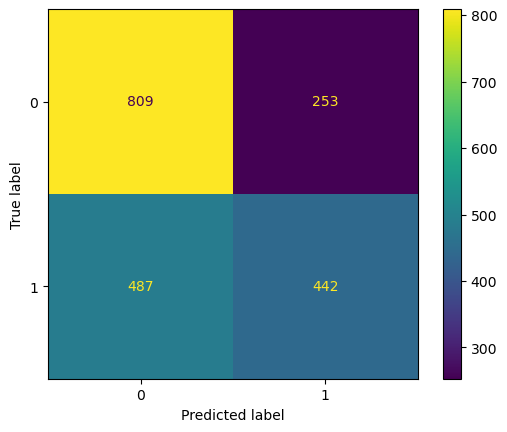

In [191]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred)).plot()

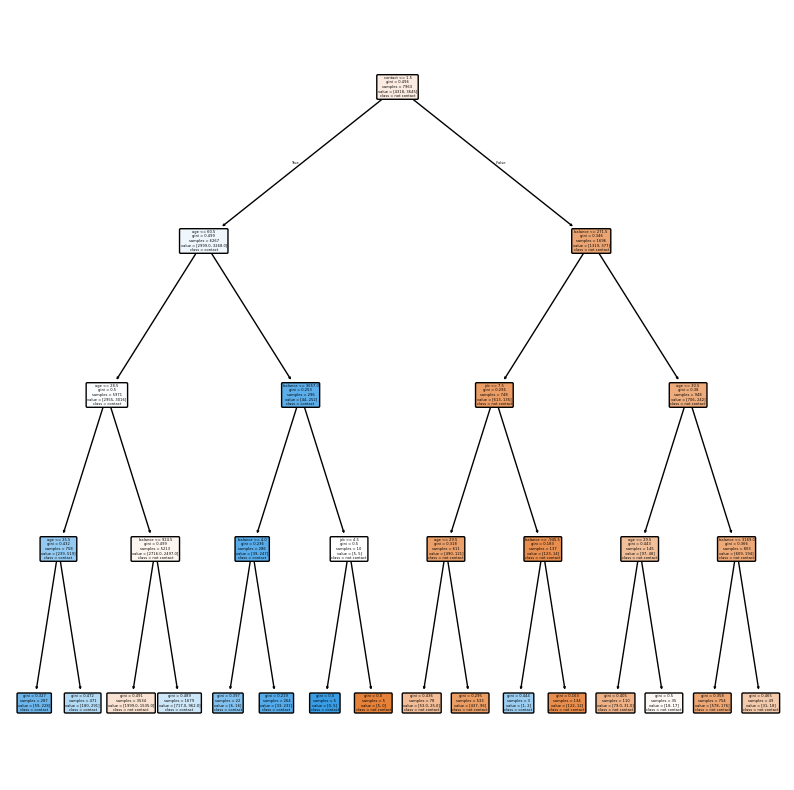

In [193]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(
    model,
    feature_names = X.columns,
    class_names =["not contact","contact"],
    filled=True,
    rounded =True
)
plt.show()

In [205]:
import pandas as pd

importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)

print(importance)


contact    0.535669
age        0.303638
balance    0.133808
job        0.026885
loan       0.000000
dtype: float64


In [206]:
print("Train acc:", model.score(X_train, y_train))
print("Test acc :", model.score(X_test, y_test))


Train acc: 0.6311691573527565
Test acc : 0.6212958312405826


In [207]:
## if too deep the data will overfit